# Modeling Gene Networks Using Ordinary Differential Equations

To gain some intuition for how systems biologists build mathematical models of gene networks we're going to use computer simulations to explore the dynamical behavior of simple transcriptional networks.

In each of our simulations we will keep track of the the concentration of a different genes of interest as they change over time.  The basic approach we will use to calculate changes in the quantity of different molecules are  differential equations, which are simply a way of describing the instanteous change in a quantity of interest.  

All of our differential equations will be of this form:

\begin{eqnarray*}
\frac{dY}{dt} = \mbox{rate of production} - \mbox{rate of decay}
\end{eqnarray*}

To state this in words --  the amount of gene $Y$  changes over time is a function of two things: 1) a growth term which represents the rate at which the gene is being transcribed and translated; and 2) a decay term which gives the rate at which $Y$ trascsripts and protein are being degraded.  

In general we will assume that the "rate of production" is a function of the concentration of the genes that regulate $Y$(i.e. it's inputs in the transcriptional network), while the "rate of decay" is a proportional to the amount of $Y$ that is present. So the above formula will take the following structure:

$$
\frac{dY}{dt} =  f(X_1, X_2, \ldots) - \alpha Y
$$

The $f(X_1, X_2, \ldots)$ term represents the growth term and is a function of the transcription factors that regulate $Y$. The term, $\alpha Y$ represents the rate at which $Y$ is being broken down or diluted.  Notice that the decay rate is a proportional to the amount of $Y$ that is present. If $\frac{dy}{dt}$ is positive than the concentration of gene $Y$ is increasing, if $\frac{dy}{dt}$ is negative the concentration of $Y$ is decreasing, and if $\frac{dy}{dt} = 0$ than $Y$ is at steady state.

### Modeling the rate of production with the Hill Function

An appropriate approach for modeling the rate of transcription of a gene, $Y$, as a function of it's inputs, $X_1, X_2,..$, is a with the "Hill Function".  The Hill Function for a single transcriptional activator is:

$$
f(X) = \frac{\beta X^n}{K^n + X^n}
$$

$X$ represents the concentration of a transcriptional activator and $f(X)$  represents the promoter activity (rate of transcription) of the gene $Y$ that is regulated by $X$.


### Modeling transcriptional activation

Write a Python function to represent transcriptional activation, using the Hill function given above:

In [6]:
# import statements to make numeric and plotting functions available
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

In [7]:
## define your function in this cell

def hill_activating(X, B, K, n):
    Xn = X**n
    return (B * Xn)/(K**n + Xn)

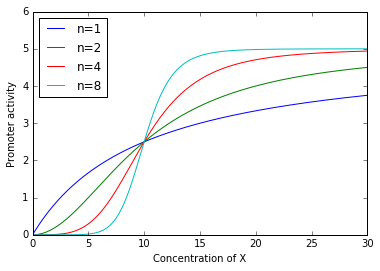

In [10]:
## generate a plot using your hill_activating function defined above
## For X values range from 0 to 30, for different values of n (n = {1,2,4,8})

# setup paramters for our simulation
B = 5
K = 10

x = linspace(0,30,200)  # generate 200 evenly spaced points between 0 and 30

plot(x, hill_activating(x, B, K, 1), label='n=1')
plot(x, hill_activating(x, B, K, 2), label='n=2')
plot(x, hill_activating(x, B, K, 4), label='n=4')
plot(x, hill_activating(x, B, K, 8), label='n=8')

xlabel('Concentration of X')
ylabel('Promoter activity')
legend(loc='best')
ylim(0, 6)
pass

### Transcriptional repression


If rather than activating $Y$'s transcription, $X$ is a transcriptional repressor we can write the corresponding Hill function as:

$$
f(X) = \frac{\beta}{1 + (X/K)^n}
$$

Remember that both of these equation describe the production of $Y$ as a function of the levels of $X$, not the temporal dynamics of $Y$ which we'll look at after developing a few more ideas.

#### Modeling transcriptional repression

Write a function to represent *transcriptional repression*, using the repressive Hill function given above:

In [11]:
## define your repressive hill function in this cell

def hill_repressing(X, B, K, n):
    return B/(1.0 + (X/K)**n)

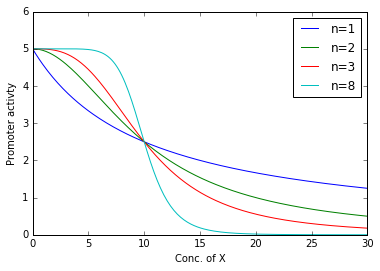

In [12]:
## generate a plot using your hill_activating function defined above
## For X values range from 0 to 30

B = 5
K = 10

x = linspace(0,30,200)

plot(x, hill_repressing(x, B, K, 1), label='n=1')
plot(x, hill_repressing(x, B, K, 2), label='n=2')
plot(x, hill_repressing(x, B, K, 3), label='n=3')
plot(x, hill_repressing(x, B, K, 8), label='n=8')

xlabel('Conc. of X')
ylabel('Promoter activty')
legend(loc='best')
ylim(0, 6)
pass

## Interactive exploration of the Hill function

Download the file `hill-fxn.py` and `pnsim.py` from the course website. Run this application from your terminal with the command: `python hill-fxn.py`.

- Run the `hill-fxn.py` script from your terminal by typing `python hill-fxn.py`. 

- There are three sliders at the bottom of the application window.  You can drag the blue regions of these sliders left or right to change the indicated parameter values.  The exact values of each parameter are shown to the right of the sliders. As you drag the sliders the plot will update to show you what the Hill function looks like for the combination of parameters you have currently specified.

- Also note there is a dashed vertical line in the plot window.  When you move your mouse over the plot window this line will follow your position.  As you do so, x- and y-plot values in the lower left of the application window will update to show you the exact position your mouse is pointing to in the plot.  The dashed line and the plot readout are useful for reading values off the plot.


### Questions 1: Use the `hill-fxn.py` script to answer the following questions:

1. Vary the parameter $n$ over the range 1 to 10.

  - a) Describe what happens to the shape of the plot.  
  - b) How does changing $n$ change the maximum (or asymptotic maximum) promoter activity ($V_{max}$)? 
  - c) At what value of activator concentration is half of the maximum promoter activity reached?

2.  Vary the parameter $\beta$.  How does changing $\beta$ change:
  - a) the shape of the plot?
  - b) the maximum promoter activity?
  - c) the activator concentration corresponding to half-maximal promoter activity?

3.  Vary the parameter $K$.  How does changing $K$ change:
  - a) the shape of the plot?
  - b) the maximum promoter activity?
  - c) the activator concentration corresponding to half-maximal promoter activity?


# Simplifying Models using Logic Approximations

To simplify analysis it's often convenient to approximate step-like sigmoidal functions like those produced by the Hill equation with functions using logic approximations. 

We'll assume that when the transcription factor, $X$, is above a threshold, $K$, then  gene $Y$ is transcribed at a rate, $\beta$.  When $X$ is below the threshold, $K$, gene $Y$ is not be transcribed.  To represent this situation,  we can rewrite the formula for $Y$ as:

$$
f(X) = \beta\ \Theta(X > K)
$$

where the function $\Theta$ is zero if the statement inside the parentheses is false or one if the statement is true. An alternate way to write this is:
$$
f(X) = 
\begin{cases}
    0,      &\text{if $X > K$;} \\
    \beta,  &\text{otherwise.}
\end{cases}
$$


When $X$ is a repressor we can write:

$$
f(X) = \beta\ \Theta(X < K)
$$

### Python functions for the logic approximation

Write Python functions to represent the logic approximations for activation and repression as given above:

In [13]:
def logic_activating(X, B, K):
    if X > K:
        theta = 1
    else:
        theta = 0
    return B*theta 

def logic_repressing(X, B, K):
    if X < K:
        theta = 1
    else:
        theta = 0
    return B*theta

Generate functions comparing the logic approximation to the Hill function, for the activating case:

In [ ]:
## generate plots using your hill_activating and logic_activating functions defined above
## For X values range from 0 to 30

B = 5
K = 10
n = 4

x = linspace(0, 30, 200)
plot(x, hill_activating(x, B, K, n), label='n=8')

logicx = [logic_activating(i, B, K) for i in x]

plot(x, logicx, label='logic approximation')

xlabel('Concentration of X')
ylabel('Promoter activity')
ylim(-0.1, 5.5)
legend(loc='best')



#### Run the script `hill-fxn-wlogic.py`

This is like the previous `hill-fxn.py` script except it now include a set of buttons for toggling the logic approximation on and off.
As before vary the parameters $n$, $\beta$ and $K$. When is the logic approximation a good approximation to the Hill function?

### Multi-dimensional Input Functions

What if a gene needs two or more activator proteins to be transcribed?  We can describe the amount of $Z$ transcribed as a function of active forms of $X$ and $Y$ with a function like:

$$
    f(X,Y) = \beta\ \Theta(X > K_x \land Y > K_y)
$$

The above equation describes "AND" logic (i.e. *both* X and Y have to be above their threshold levels, $K_x$ and $K_y$, for Z to be transcribed). In a similar manner we can define "OR" logic:

$$
f(X,Y) = \beta\ \Theta(X > K_x \lor Y > K_y)
$$

A SUM function would be defined like this:

$$
f(X,Y) = \beta_x \Theta(X > K_x) + \beta_y \Theta (Y > K_y)
$$


# Modeling changes in transcript concentration over time

Up until this point we've been considering how promoter _activity_ changes with the concentration of a transcriptional activator or promoter.  Now we want to turn to the question of how the amount of transcript of a gene $Y$ changes over time.

How the amount of $Y$ transcript changes over time is a function of two things: 1) a growth term which represents the rate at which the gene is being transcribed; and 2) a decay term which gives the rate at which transcripts are being degraded.  We can write down a simple differential equation for this as follows:

$$
\frac{dY}{dt} =  f(X_1, X_2, \ldots) - \alpha Y
$$

The $f(X_1, X_2, \ldots)$ term represents the growth term and is a function of the transcription factors that regulate $Y$. The term, $\alpha Y$ represents the rate at which $Y$ is being broken down or diluted.  Notice that the decay rate is a proportional to the amount of $Y$ that is present.

We've already seen a couple of ways to model the rate of transcription -- using the Hill function or its logic approximation. For the sake of simplicity we'll use the logic approximation to model the growth term.  For example, in the case $Y$ is regulated by a single input we might use $f(X) = \beta \theta(X > K_1)$.  For the equivalent function where $Y$ was regulated by two transcription factor, $X_1$ and $X_2$, and both are required to be above the respective threshold, we could use the function $f(X_1, X_2) = \beta \theta (X_1 > K_1 \land X_2 > K_2)$.


### Change in transcript concentration under constant activation

Now let's explore a simple model of regulation for the two gene network, $X \longrightarrow Y$. Here we assume that at time 0 the activator, $X$, rises above the threshold, $K$, necessary to induce transcription of $Y$ at the rate $\beta$.  $X$ remains above this threshold for the entire simulation. Therefore, we can write $dY/dt$ as:

$$
\frac{dY}{dt} =  \beta - \alpha Y
$$


Write a Python function to represent the change in $Y$ in a given time increment, under this assumption of constant activation:

In [ ]:
def dYdt(B,a,Y):
    pass ## replace this line with your function definition

In [ ]:
## generate a plot using your dY function defined above
## Evaluated over 200 time units

Y = [0]
B = 0.2
a = 0.05
nsteps = 200

for i in range(nsteps):
    deltay = dYdt(B, a, Y[-1])
    ynew = Y[-1] + deltay
    Y.append(ynew)
    
plot(Y)
ylim(0, 4.5)
xlabel('Time units')
ylabel('Concentration of Y')




In [ ]:

X = [0]*50 + [1]*100 + [0]*100

Y = [0]

B = 0.2
K = 0.5
a = 0.05
nsteps = 250

for i in range(1, nsteps):
    xnow = X[i]
    growth = logic_activating(xnow, B, K)
    decay = a*Y[-1]
    deltay = growth - decay
    ynew = Y[-1] + deltay
    Y.append(ynew)
    
plot(X)
plot(Y)
ylim(0, 4.5)
xlabel('Time units')
ylabel('Concentration of Y')


### Homework 2: Use the `simple-activation.py` script to answer the following questions:

The `simple-activation.py` script simulates the case of constant transcriptional activation as described above. Run the `simple-activation.py` script from the terminal, using the command `python simple-activation.py`. This script includes three sliders:

* $t_{max}$ which sets the number of time steps over which the simulation is run
* $\beta$
* $\alpha$

#### Questions

1.  The concentration of $Y$ eventually reaches a steady state, $Y_{st}$.  How does $Y_{st}$ relate to $\beta$ and $\alpha$?
2. The **response time** of a dynamical system, $T_{1/2}$is defined as the time it takes for it to go half-way between it's initial and final value.  
    - a) How does the response time change as you vary $\beta$?
    - b) How does the response time change as you vary $\alpha$?

3. In Excel (or Python) create a plot showing the relationship between $\alpha$ and response time, for $0.1 \leq \alpha \leq 2.0$.

## Autoregulation

We're now going to contrast simple activation, of the type $X \longrightarrow Y$, with two types of autoregulation: 1) negative autoregulation ($Y \dashv Y$); and 2) positive autoregulation ($Y \longrightarrow Y$).

We will model autoregulation as follows:

$$
\frac{dY}{dt} = g(Y > K) - \alpha Y
$$

where:

$$
g(Y) = \begin{cases}
    \beta_0,      &\text{if $Y < K$;} \\
    \beta_1,    &\text{otherwise.}
\end{cases}
$$

Simple regulation is the case where $\beta_0 = \beta_1$; negative autoregulation corresponds to $\beta_0 > \beta_1$; positive autoregulation is when $\beta_0 < \beta_1$

Write a Python function to represent autoregulation:

In [ ]:
## Write your function here

def dYdt_autoreg(B0, B1, K, a, Y):
    pass ## replace this line with your function definition

In [ ]:
## Generate some plots illustrating positive and negative autoregulation

Y = [0]
a = 0.05
K = 3
nsteps = 200

## negative autoreg
B0 = 0.4
B1 = 0.3

for i in range(nsteps):
    pass ## simulate Y here
#plot(Y)


## *** Now do positive autoregulation *** ##

Y = [0]  # reset Y
B0 = 0.2
B1 = 0.3

for i in range(nsteps):
    pass ## simulate Y here
#plot(Y)



### Homework 3: Use the `autoreg.py` script to answer the following questions:

Run the `autoreg.py` script. There are four sliders, representing:

* a) The threshold $K$ when autoregulation kicks in
* b) The initial growth rate, $\beta_0$
* c) The growth rate after feedback starts, $\beta_1$
* d) The decay rate, $\alpha$

#### Questions
1. As long as the threshold $K$ is exceeded, which parameters determine the final steady state of the system?

2. Keeping $\alpha$ and $\beta_1$ constant, vary $\beta_0$ so that it is both less than $\beta_1$ (positive autoregulation) and greater than $\beta_1$ (negative autoregulation).  
    - a) How does negative autoregulation effect the response time of the system?  
    - b) How does positive autoregulation effect the response time of the system?

### Document Formating

In [ ]:
import urllib
from IPython.core.display import HTML
def css_styling():
    #styles = open("custom.css", "r").read()
    styles = urllib.urlopen("http://people.duke.edu/~pm21/ipython-custom.css").read()
    return HTML(styles)
css_styling()